# PCA

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
genes=np.load("genes_qnorm_v11_clean_noutliers_nosecret.npy",allow_pickle=True)
samples=np.load("samples_qnorm_v11_clean_noutliers_nosecret.npy",allow_pickle=True)
X=np.load("results_qnorm_v11_clean_noutliers_nosecret.npy",allow_pickle=True)
results=pd.DataFrame(X,index=genes,columns=samples)

In [39]:
results=pd.DataFrame(X,index=genes,columns=samples).T
results.head()

,A1CF,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,AADACL4,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM741172,0,0,23,0,39,15,0,0,0,4,...,33,118,0,1,5,4,3,205,14,22
GSM741170,0,0,23,0,38,15,0,0,0,6,...,44,185,0,1,5,4,4,128,11,28
GSM741171,0,0,23,0,37,14,0,0,0,5,...,30,110,0,1,3,4,3,225,11,17
GSM907015,0,0,1,1,21,5,0,0,0,0,...,8,3,1,2,9,0,6,266,18,9
GSM1193921,0,0,8,0,17,9,0,0,0,4,...,27,221,0,2,5,2,5,97,10,24


In [4]:
results.shape

(62571, 18952)

In [6]:
secretome=pd.read_csv("secretome_included_V11.csv",header=None,names=["gene"])

In [7]:
secretome.head()

,gene
0,SERPINB5
1,IGHV6-1
2,CGB3
3,WNT7A
4,DEFB126


In [8]:
secretome.shape

(1890, 1)

In [9]:
for gene in secretome.gene:
    if gene not in results.columns:
        print(gene)

In [10]:
results.drop(secretome.gene, axis=1,inplace=True)

In [40]:
results.head()

,A1CF,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,AADACL4,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM741172,0,0,23,0,39,15,0,0,0,4,...,33,118,0,1,5,4,3,205,14,22
GSM741170,0,0,23,0,38,15,0,0,0,6,...,44,185,0,1,5,4,4,128,11,28
GSM741171,0,0,23,0,37,14,0,0,0,5,...,30,110,0,1,3,4,3,225,11,17
GSM907015,0,0,1,1,21,5,0,0,0,0,...,8,3,1,2,9,0,6,266,18,9
GSM1193921,0,0,8,0,17,9,0,0,0,4,...,27,221,0,2,5,2,5,97,10,24


In [41]:
results.shape

(62571, 18952)

In [134]:
hp=pd.read_csv("high_producers_v11_20_TPM.csv",usecols=[0])
lp=pd.read_csv("low_producers_v11_20_TPM.csv",usecols=[0])
hp.columns=["sample"]
lp.columns=["sample"]

In [135]:
hp["type"]="High_producer"
lp["type"]="Low_producer"

In [136]:
ctype=pd.concat([hp,lp])

In [137]:
ctype.shape

(25028, 2)

In [138]:
ctype.set_index("sample",inplace=True)

In [139]:
ctype.head()

,type
sample,
GSM3350577,High_producer
GSM2197433,High_producer
GSM3350601,High_producer
GSM2197432,High_producer
GSM3350618,High_producer


In [140]:
#this will discard all samples other than the chosen high and low producers
results2=pd.merge(left=results,right=ctype,left_index=True,right_index=True,how="left")

In [141]:
results2.head()

,A1CF,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,AADACL4,AADAT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,type
GSM741172,0,0,23,0,39,15,0,0,0,4,...,118,0,1,5,4,3,205,14,22,NaN
GSM741170,0,0,23,0,38,15,0,0,0,6,...,185,0,1,5,4,4,128,11,28,NaN
GSM741171,0,0,23,0,37,14,0,0,0,5,...,110,0,1,3,4,3,225,11,17,NaN
GSM907015,0,0,1,1,21,5,0,0,0,0,...,3,1,2,9,0,6,266,18,9,High_producer
GSM1193921,0,0,8,0,17,9,0,0,0,4,...,221,0,2,5,2,5,97,10,24,NaN


In [142]:
results2.shape

(62571, 18953)

In [143]:
results2.dropna(inplace=True)

In [144]:
results2.shape

(25028, 18953)

In [145]:
results2.head()

,A1CF,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL3,AADACL4,AADAT,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,type
GSM907015,0,0,1,1,21,5,0,0,0,0,...,3,1,2,9,0,6,266,18,9,High_producer
GSM1216828,8,0,0,0,22,28,1,0,0,3,...,2,1,4,9,0,10,15,16,39,High_producer
GSM1216812,4,0,2,0,26,27,6,0,0,2,...,5,0,2,9,0,8,40,11,19,High_producer
GSM1159902,0,0,0,0,84,195,0,0,0,3,...,0,0,0,8,3,3,13,19,98,Low_producer
GSM1241140,0,0,0,0,35,9,3,0,0,8,...,93,0,3,3,0,6,3,0,39,Low_producer


In [146]:
results2.iloc[:,:-1].values

array([[  0,   0,   1, ..., 266,  18,   9],
       [  8,   0,   0, ...,  15,  16,  39],
       [  4,   0,   2, ...,  40,  11,  19],
       ...,
       [  0,   0,   4, ...,  67,   1,  39],
       [  0,   0,   3, ...,  61,   1,  37],
       [  0,   0,   0, ..., 639,  19,   9]])

In [147]:
results2["type"].values

array(['High_producer', 'High_producer', 'High_producer', ...,
       'Low_producer', 'Low_producer', 'High_producer'], dtype=object)

In [148]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [149]:
X = results2.iloc[:,:-1].values
y = results2["type"]

#X=RobustScaler().fit_transform(X)
#X=MinMaxScaler(feature_range=(0,1)).fit_transform(X)
#X=StandardScaler().fit_transform(X)

In [150]:
pca = PCA(n_components=2)

In [151]:
principalComponents = pca.fit_transform(X)

In [152]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'],index=results2.index)

In [153]:
results2["type"]

GSM907015     High_producer
GSM1216828    High_producer
GSM1216812    High_producer
GSM1159902     Low_producer
GSM1241140     Low_producer
                  ...      
GSM5567312     Low_producer
GSM5567314     Low_producer
GSM5567315     Low_producer
GSM5567316     Low_producer
GSM5580102    High_producer
Name: type, Length: 25028, dtype: object

In [154]:
principalDf.head()

,principal component 1,principal component 2
GSM907015,2486.354710,31157.253276
GSM1216828,-14399.019072,-3314.244238
GSM1216812,-8453.820868,-5306.202768
GSM1159902,16300.733499,6484.369605
GSM1241140,-5443.877065,-12789.537407


In [155]:
finalDf = pd.concat([principalDf, results2['type']],axis=1)

In [156]:
finalDf.head()

,principal component 1,principal component 2,type
GSM907015,2486.354710,31157.253276,High_producer
GSM1216828,-14399.019072,-3314.244238,High_producer
GSM1216812,-8453.820868,-5306.202768,High_producer
GSM1159902,16300.733499,6484.369605,Low_producer
GSM1241140,-5443.877065,-12789.537407,Low_producer


<ipython-input-157-761cda317244>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbo_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  ax.figure.savefig("PCA_40_qnorm_nos.png",bbo_inches="tight")


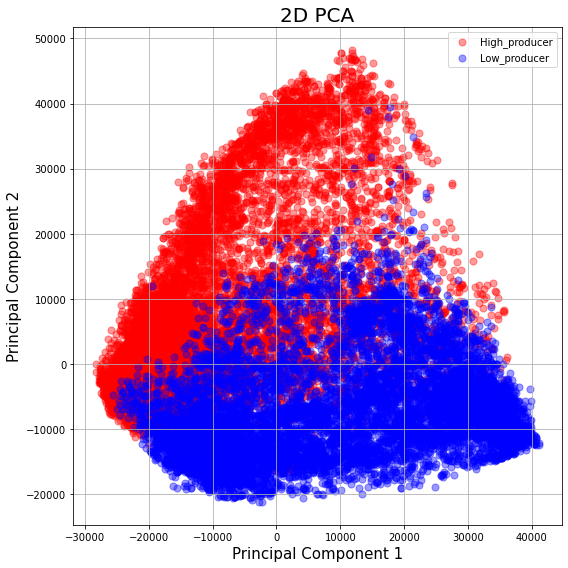

In [157]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = ['High_producer', 'Low_producer']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,alpha=0.4)
ax.legend(targets)
ax.grid()
plt.tight_layout()
ax.figure.savefig("PCA_40_qnorm_nos.png",bbo_inches="tight")

In [158]:
plasma=pd.read_csv("plasma_cell.csv",usecols=[0])
hek=pd.read_csv("HEK293.csv",usecols=[0])
alpha=pd.read_csv("alpha_cell.csv",usecols=[0])
thymocyte=pd.read_csv("thymocyte.csv",usecols=[0])
pancreatic=pd.read_csv("pancreatic.csv",usecols=[0])

In [159]:
for sample in plasma.values:
    if sample in finalDf.index.values:
        finalDf.loc[sample,"type"]="Plasma Cell"

In [160]:
for sample in hek.values:
    if sample in finalDf.index.values:
        finalDf.loc[sample,"type"]="HEK293"

In [161]:
for sample in pancreatic.values:
    if sample in finalDf.index.values:
        finalDf.loc[sample,"type"]="Pancreatic Islet"

In [162]:
for sample in thymocyte.values:
    if sample in finalDf.index.values:
        finalDf.loc[sample,"type"]="Thymocyte"

<ipython-input-163-d02b8f48cad1>:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbo_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  ax.figure.savefig("PCA_40_qnorm_color_nos.svg",bbo_inches="tight")


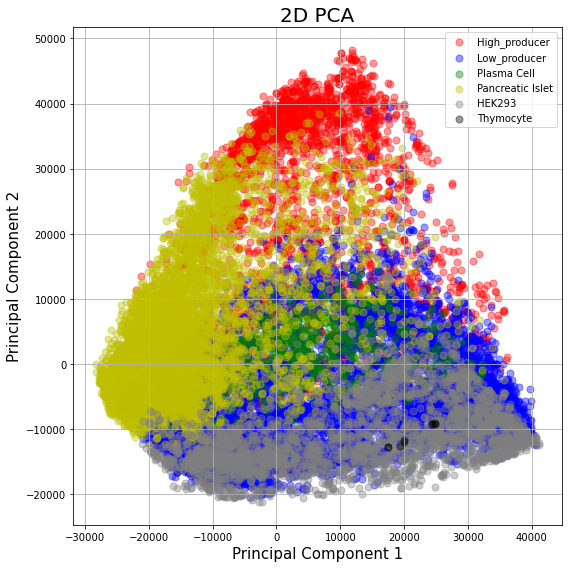

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = ['High_producer', 'Low_producer','Plasma Cell','Pancreatic Islet','HEK293','Thymocyte']
colors = ['r', 'b','g','y','grey','k',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,alpha=0.4)
ax.legend(targets)
ax.grid()
plt.tight_layout()
ax.figure.savefig("PCA_40_qnorm_color_nos.svg",bbo_inches="tight")